In [26]:
import csv
import pandas as pd

data = pd.read_csv('iris_csv.csv')
data = pd.get_dummies(data, columns=['Species'])
data

,Sepal length,Sepal width,Petal length,Petal width,Species_I. setosa,Species_I. versicolor,Species_I. virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


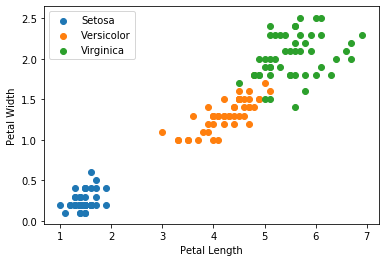

In [61]:
import matplotlib.pyplot as plt

setosa = data.loc[data['Species_I. setosa'] == 1]
versicolor = data.loc[data['Species_I. versicolor'] == 1]
virginica = data.loc[data['Species_I. virginica'] == 1]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x=setosa['Petal length'], y=setosa['Petal width'], label="Setosa")
ax1.scatter(x=versicolor['Petal length'], y=versicolor['Petal width'], label="Versicolor")
ax1.scatter(x=virginica['Petal length'], y=virginica['Petal width'], label="Virginica")

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc='upper left')
plt.show()

In [70]:
from sklearn.cluster import estimate_bandwidth, MeanShift
import numpy as np
estimate_bandwidth(data)


1.423090818220137

In [71]:
analyzer = MeanShift(bandwidth=1) 
analyzer.fit(data)

MeanShift(bandwidth=1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [72]:
labels = analyzer.labels_
print(labels)
print('\n\n',np.unique(labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


 [0 1 2]


In [74]:
data['cluster_group'] = np.nan
data_length=len(data)
for i in range(data_length): # loop 714 rows
    data.iloc[i,data.columns.get_loc('cluster_group')] = labels[i] #set the cluster label on each row

data.head()

,Sepal length,Sepal width,Petal length,Petal width,Species_I. setosa,Species_I. versicolor,Species_I. virginica,cluster_group
0,5.1,3.5,1.4,0.2,1,0,0,0.0
1,4.9,3.0,1.4,0.2,1,0,0,0.0
2,4.7,3.2,1.3,0.2,1,0,0,0.0
3,4.6,3.1,1.5,0.2,1,0,0,0.0
4,5.0,3.6,1.4,0.2,1,0,0,0.0


In [75]:
data.describe()

,Sepal length,Sepal width,Petal length,Petal width,Species_I. setosa,Species_I. versicolor,Species_I. virginica,cluster_group
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333,0.333333,0.333333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.472984,0.472984,0.472984,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000,2.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000,2.000000


In [76]:
cluster_data = data.groupby(['cluster_group']).mean()
#Count of passengers in each cluster
cluster_data['Counts'] = pd.Series(data.groupby(['cluster_group']).size())
cluster_data

,Sepal length,Sepal width,Petal length,Petal width,Species_I. setosa,Species_I. versicolor,Species_I. virginica,Counts
cluster_group,,,,,,,,
0.0,5.006,3.428,1.462,0.246,1,0,0,50
1.0,5.936,2.770,4.260,1.326,0,1,0,50
2.0,6.588,2.974,5.552,2.026,0,0,1,50


In [ ]:
cluster